In [1]:
!pip install kaggle --q

In [97]:
import opendatasets as od
import numpy as np
from scipy.stats import norm

In [3]:
od.download('https://www.kaggle.com/datasets/anand0427/cars93')

Skipping, found downloaded files in ".\cars93" (use force=True to force download)


In [4]:
import os

In [5]:
import pandas as pd

In [6]:
cars_93_raw = pd.read_csv("cars93/Cars93.csv")

In [7]:
cars_93_raw

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [8]:
cars_93_raw.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
cars_93_raw.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [10]:
cars_93_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [11]:
cars_data=cars_93_raw[['MPG.city','EngineSize','RPM','Horsepower','Length','Wheelbase','Turn.circle','DriveTrain','Type','AirBags']]

In [12]:
cars_data.head(10)

,MPG.city,EngineSize,RPM,Horsepower,Length,Wheelbase,Turn.circle,DriveTrain,Type,AirBags
0,25,1.8,6300,140,177,102,37,Front,Small,None
1,18,3.2,5500,200,195,115,38,Front,Midsize,Driver & Passenger
2,20,2.8,5500,172,180,102,37,Front,Compact,Driver only
3,19,2.8,5500,172,193,106,37,Front,Midsize,Driver & Passenger
4,22,3.5,5700,208,186,109,39,Rear,Midsize,Driver only
5,22,2.2,5200,110,189,105,41,Front,Midsize,Driver only
6,19,3.8,4800,170,200,111,42,Front,Large,Driver only
7,16,5.7,4000,180,216,116,45,Rear,Large,Driver only
8,19,3.8,4800,170,198,108,41,Front,Midsize,Driver only
9,16,4.9,4100,200,206,114,43,Front,Large,Driver only


In [13]:
import seaborn as sns

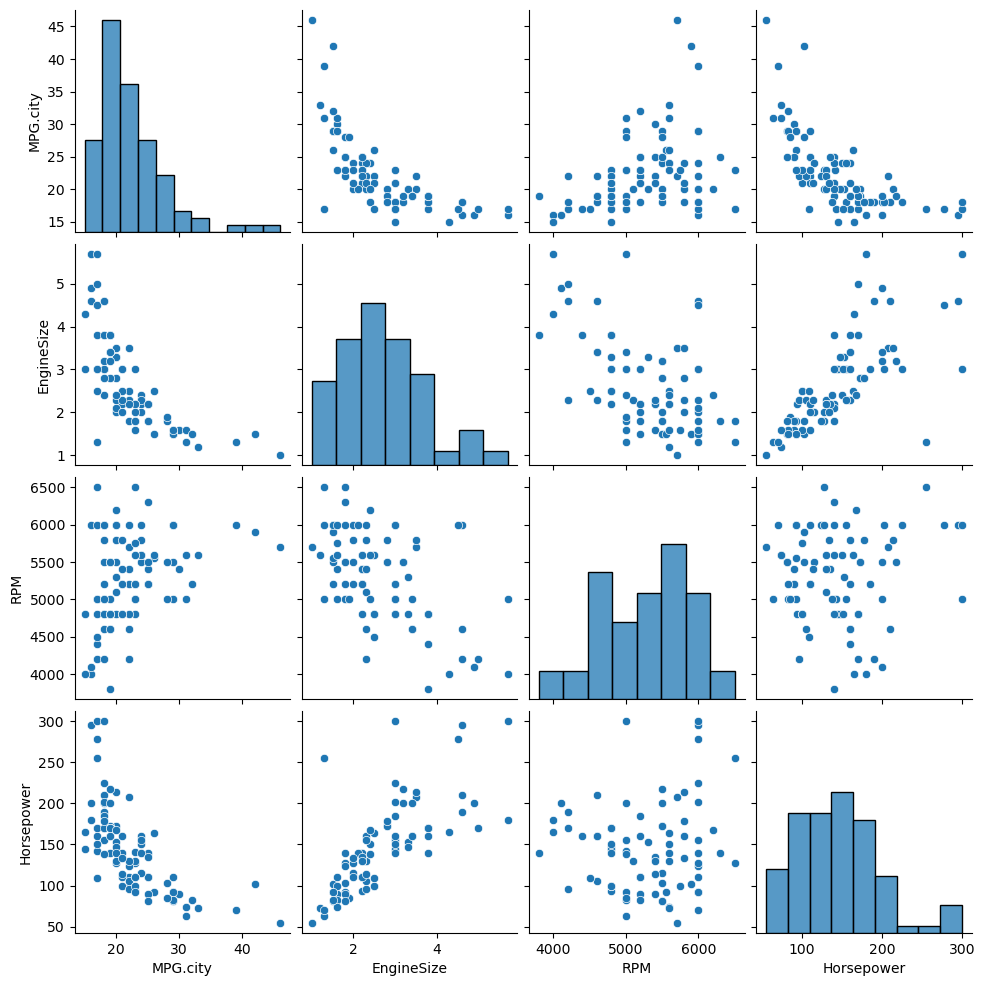

In [14]:
sns.pairplot(cars_data,vars=['MPG.city','EngineSize','RPM','Horsepower'])

In [15]:
import matplotlib.pyplot as plt

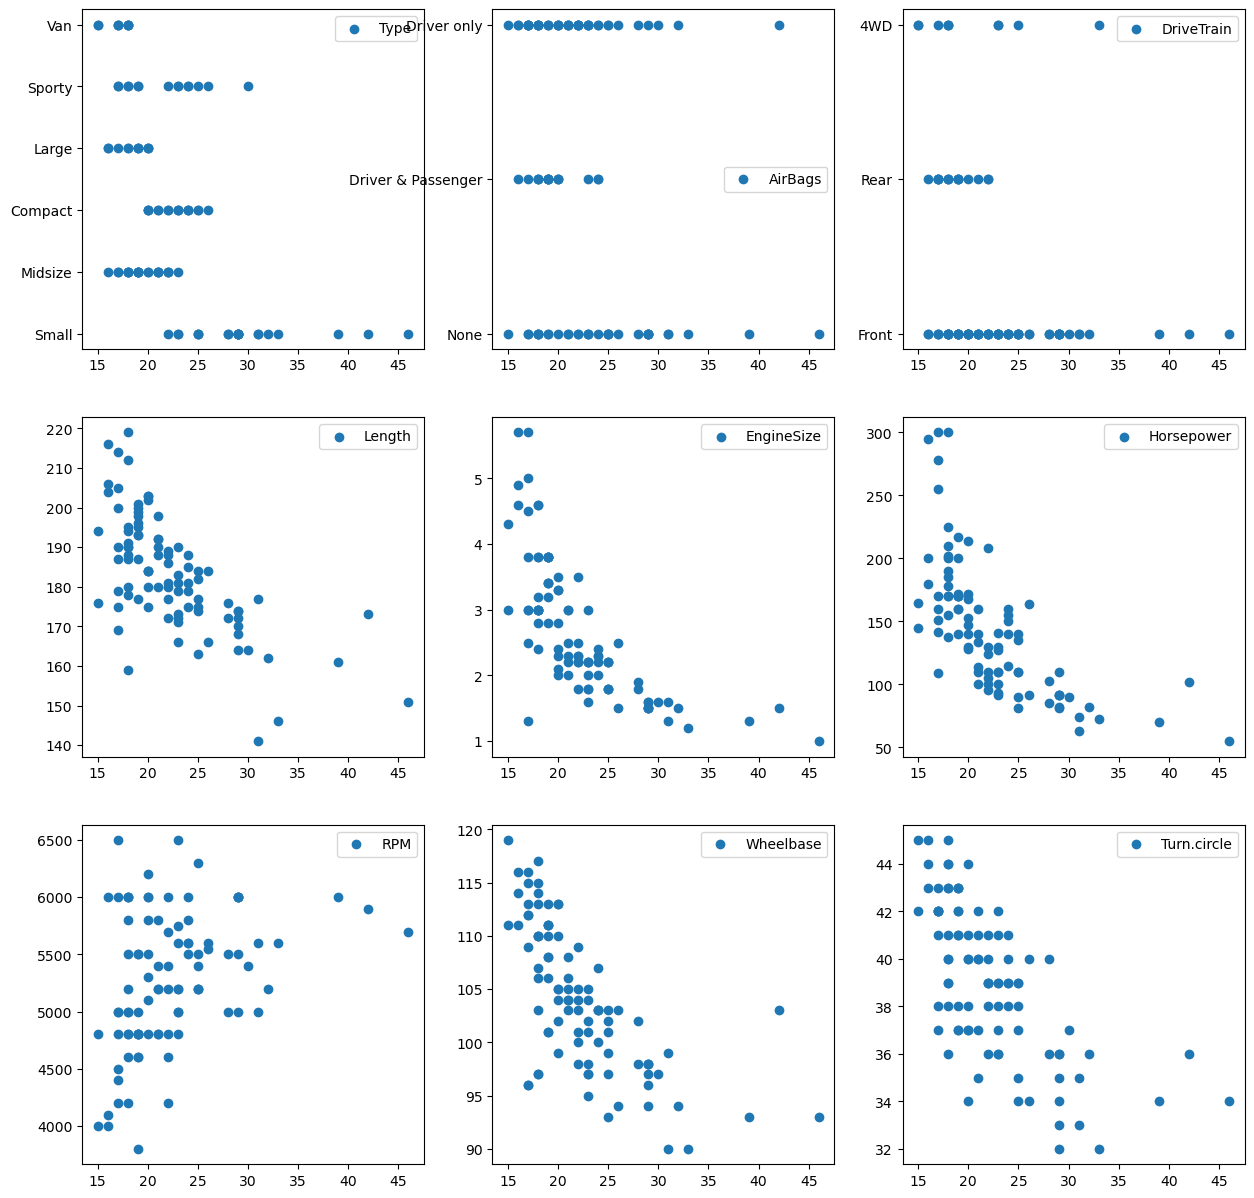

In [16]:
sel_cols=['Type','AirBags','DriveTrain','Length','EngineSize','Horsepower','RPM','Wheelbase','Turn.circle']

fig,ax = plt.subplots(3,3,squeeze=False,figsize=(15,15))
count=0
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(y=cars_data[sel_cols[count]],x=cars_data['MPG.city'],label=sel_cols[count])
        ax[i,j].legend()
        count+=1
    

In [17]:
cars_data[sel_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         93 non-null     object 
 1   AirBags      93 non-null     object 
 2   DriveTrain   93 non-null     object 
 3   Length       93 non-null     int64  
 4   EngineSize   93 non-null     float64
 5   Horsepower   93 non-null     int64  
 6   RPM          93 non-null     int64  
 7   Wheelbase    93 non-null     int64  
 8   Turn.circle  93 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.7+ KB


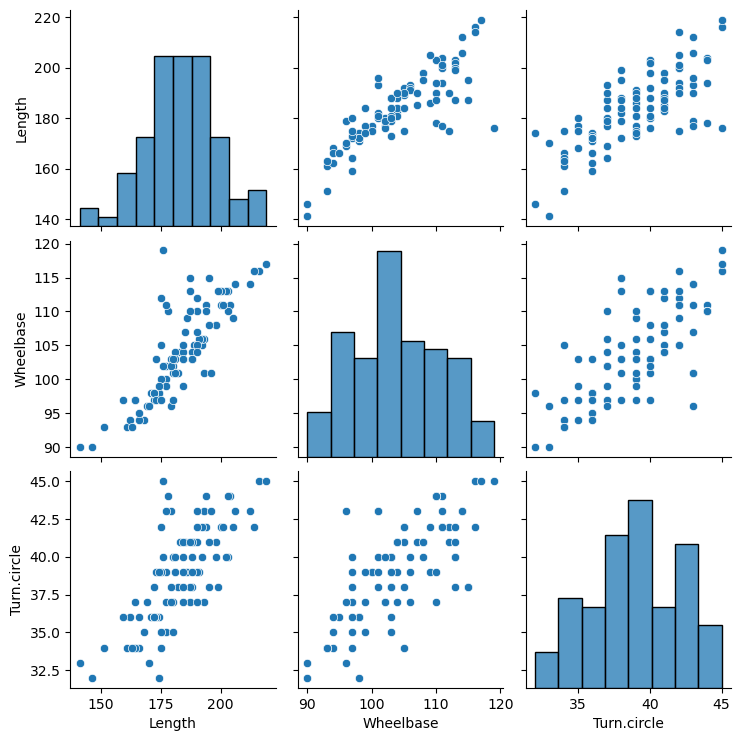

In [18]:
sns.pairplot(cars_data,vars=['Length','Wheelbase','Turn.circle'])

In [19]:
# mpg/enginesize
# mpg /horsepower
# mpg/rpm
# enginesize/horsepower
# length/wheelbase
# length/turncircle
# wheelbase/turncircle

In [20]:
cars_data[['MPG.city','EngineSize','Horsepower','RPM']].cov()

,MPG.city,EngineSize,Horsepower,RPM
MPG.city,31.582281,-4.139165,-197.979897,1217.478962
EngineSize,-4.139165,1.076122,39.776999,-339.163745
Horsepower,-197.979897,39.776999,2743.078775,1146.633941
RPM,1217.478962,-339.163745,1146.633941,356088.709677


In [21]:
print('Hello world')

Hello world


In [22]:
cars_data['Length'].corr(cars_data['Turn.circle'],method='pearson')

0.7389545018604418

In [23]:
cars_data['Length'].corr(cars_data['Turn.circle'],method='kendall')

0.5685478537046244

In [24]:
cars_data['RPM'].corr(cars_data['MPG.city'],method='spearman')

0.38964509885135185

In [25]:
two_way_table = pd.crosstab(index=cars_data['DriveTrain'],columns=cars_data['Type'])
two_way_table 

Type,Compact,Large,Midsize,Small,Sporty,Van
DriveTrain,,,,,,
4WD,1,0,0,2,2,5
Front,13,7,17,19,7,4
Rear,2,4,5,0,5,0


In [26]:
from scipy.stats import chi2,chi2_contingency

In [27]:
chi2_contingency(two_way_table)

Chi2ContingencyResult(statistic=35.00129365348582, pvalue=0.00012480179759447616, dof=10, expected_freq=array([[ 1.72043011,  1.1827957 ,  2.3655914 ,  2.25806452,  1.50537634,
         0.96774194],
       [11.52688172,  7.92473118, 15.84946237, 15.12903226, 10.08602151,
         6.48387097],
       [ 2.75268817,  1.89247312,  3.78494624,  3.61290323,  2.40860215,
         1.5483871 ]]))

In [28]:
# pd.crosstab(index=cars_data["Man.trans.avail"],columns=cars_data["Origin"])

In [29]:
states = [ 's'+str(i) for i in range(0,16)]
states

['s0',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15']

In [30]:
np.random.choice(states,size=8,replace=False)

array(['s12', 's8', 's6', 's14', 's13', 's7', 's5', 's2'], dtype='<U3')

In [32]:
emp=pd.read_csv("cars93/emp.csv")

In [33]:
emp

,Employee_ID,Dept,Job_Level
0,1001,D1,JL2
1,1002,D1,JL2
2,1003,D1,JL2
3,1004,D1,JL3
4,1005,D1,JL3
5,1006,D1,JL3
6,1007,D2,JL2
7,1008,D2,JL2
8,1009,D2,JL2
9,1010,D2,JL3


In [41]:
tab_emp=pd.crosstab(index=emp['Dept'],columns=emp['Job_Level'],colnames=[''])
tab_emp

,JL2,JL3
Dept,,
D1,3,3
D2,3,3


In [46]:
emp.groupby(['Dept','Job_Level'],group_keys=False).apply(lambda x:x.sample(1))

,Employee_ID,Dept,Job_Level
2,1003,D1,JL2
5,1006,D1,JL3
7,1008,D2,JL2
9,1010,D2,JL3


In [63]:
students_mark=pd.read_csv("cars93/students_mark.csv")

In [64]:
students_mark

,studentID,stateID,SchoolID,Mark
0,1000,ST1,ST1S1,467
1,1001,ST1,ST1S1,366
2,1002,ST1,ST1S1,412
3,1003,ST1,ST1S1,532
4,1004,ST1,ST1S1,474
...,...,...,...,...
1115,2115,ST8,ST8S7,280
1116,2116,ST8,ST8S7,408
1117,2117,ST8,ST8S7,504
1118,2118,ST8,ST8S7,313


Text(0, 0.5, 'COUNT OF STUDENTS')

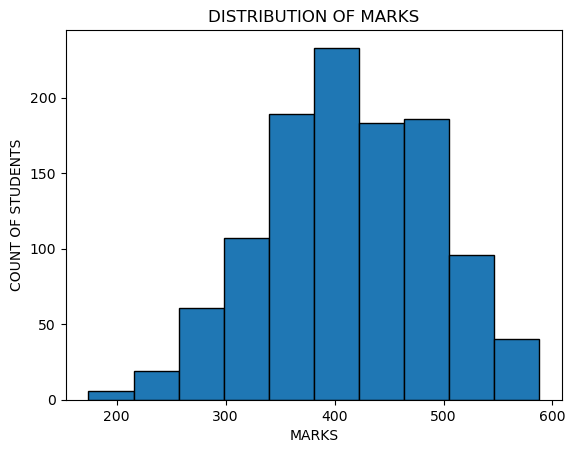

In [73]:
plt.hist(students_mark['Mark'],edgecolor='black')
plt.title('DISTRIBUTION OF MARKS')
plt.xlabel('MARKS')
plt.ylabel('COUNT OF STUDENTS')

In [78]:
mean = np.mean(students_mark['Mark'])
mean

413.2758928571429

In [80]:
variance = np.var(students_mark['Mark'])
variance

5951.426561702816

In [81]:
standard_Deviation = np.std(students_mark['Mark'])
standard_Deviation

77.14548957458767

(array([2., 4., 3., 1.]),
 array([1. , 2.6, 4.2, 5.8, 7.4]),
 <BarContainer object of 4 artists>)

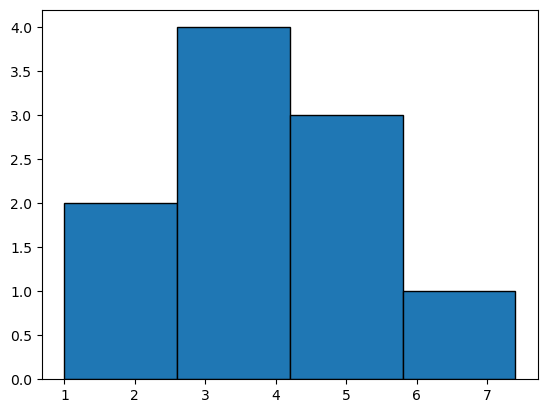

In [92]:
sample_means = np.array([2,3.5,2.5,4,5,4,5.5,4.5,3,6])
plt.hist(sample_means , edgecolor='black',bins=np.arange(1.0,8.0,1.6))

In [100]:
p_value = norm.cdf(-4.56435)
p_value

2.5052214511714794e-06

In [103]:
p_value=norm.cdf(-1.90)
p_value

0.028716559816001803

In [104]:
p_value=norm.cdf(-4)
p_value

3.167124183311986e-05